
# Project: Investigate a Dataset (IMDB Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
IMDb (Internet Movie Database) is one of the most recognized names for its comprehensive online database collection of movies, films, TV series and so on. As of today , you’ll see through the following data pull that IMDb database has approximately 7 million titles. In this article, I will use Python in Jupyter Notebook to demonstrate where to pull the data, how to quickly interpret the data and answer some interesting questions.

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Data Import

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

### Data Assessment

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.duplicated().sum()

1

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Assessment
a) Drop redundant columns id, imdb_id, homepage, taglines, keywords, overview, budget_adj, revenue_adj

b) data type of 'release_date', 'release_year' attributes must converted to date

c)  dublicated rows

d)  null values

### Data Cleaning

In [11]:
df_clean = df.copy()

In [12]:
#Drop redundant attributes
drop_cols = ['id','imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj']
df_clean.drop(drop_cols, inplace = True, axis = 1)



In [13]:
#test
df_clean.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015


In [14]:
# Remove Duplicates
df.drop_duplicates(keep=False, inplace=True)

In [15]:
# Test
df.duplicated().sum()

0

In [16]:
# convert type of ['release_date','release_year'] to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])
#df_clean['release_year'] = pd.to_datetime(df_clean['release_year'])

In [17]:
# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
dtypes: datetime64[ns

## <a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from 2000 to 2014?)

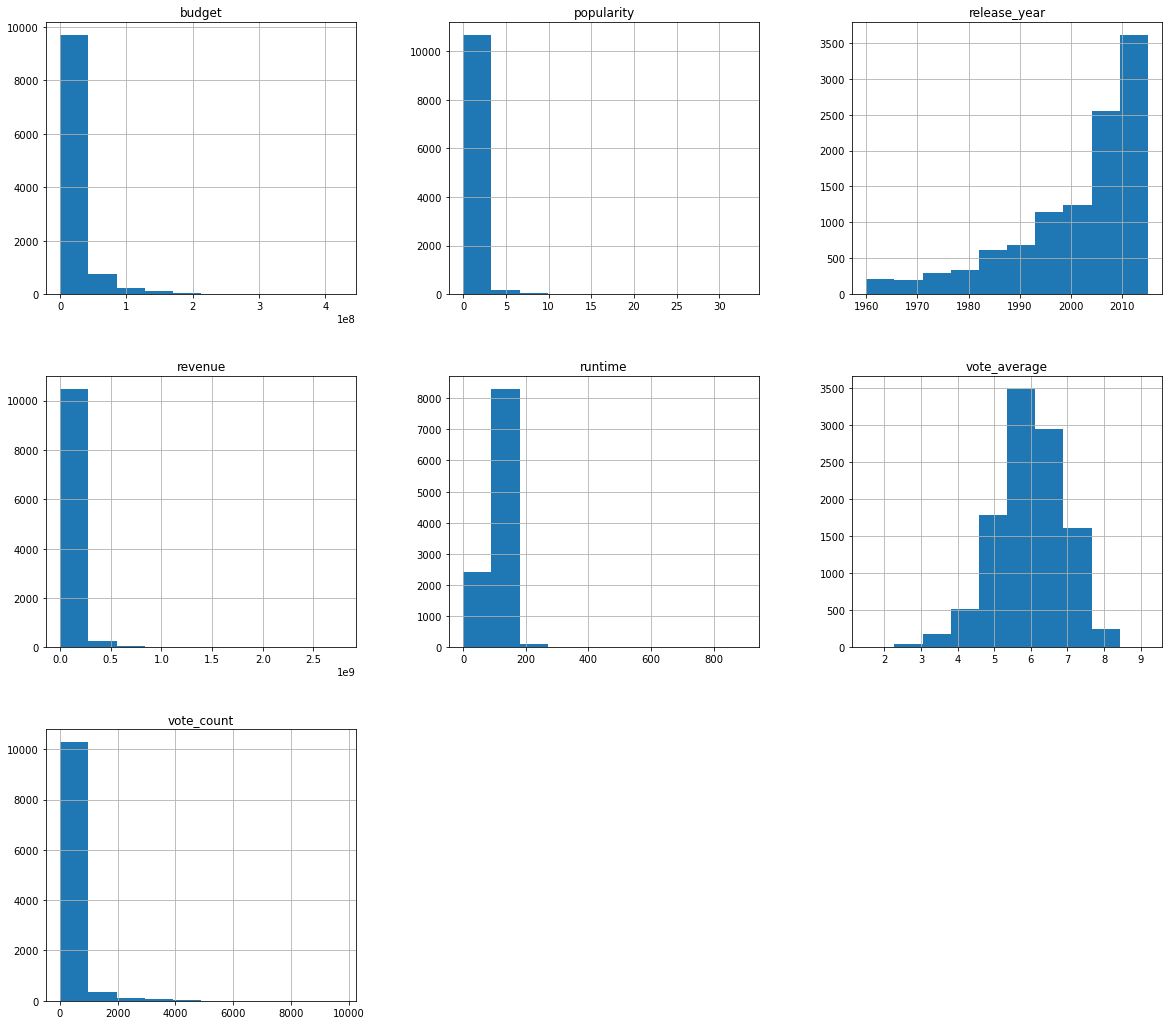

In [18]:
df_clean.hist(figsize = (20,18));

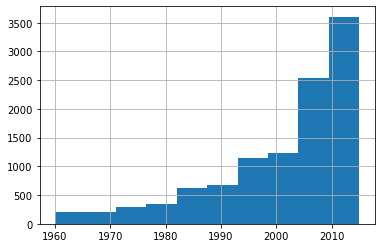

In [19]:
df.release_year.hist()

In [30]:
df1 = df_clean[( df_clean.release_year > 2000) ]
df1 = df1[['release_year','genres']]
df1.genres.value_counts()
df1.genres.mode()

0    Drama
dtype: object

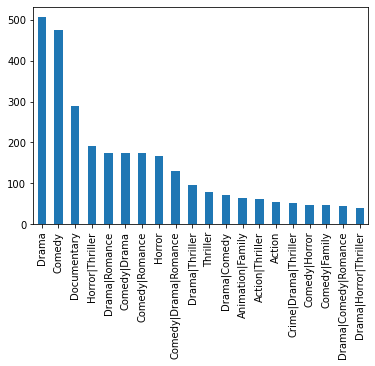

In [31]:
df1['genres'].value_counts().head(20).plot(kind='bar');

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [22]:
def regplot(feature, label, dataframe):
    sns.regplot(x = feature,  
            y = label,  
            data = dataframe) ;

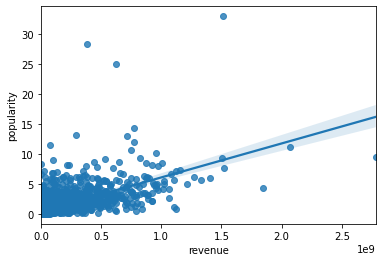

In [23]:
regplot("revenue", "popularity", df_clean)

### Proportinal relation between revenue and popularity , as the movies with higher revenue are more popular

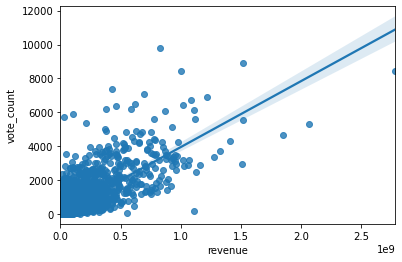

In [24]:

regplot("revenue", "vote_count", df_clean)

### Proportinal relation between revenue and vote_count , as the movies with higher revenue have more vote count

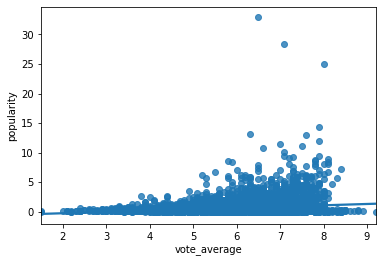

In [25]:
regplot("vote_average", "popularity", df_clean)

### Proportinal relation between revenue and average_vote , as the movies with higher revenue are higher rated

<a id='conclusions'></a>
## Conclusions and Insights

a) Drama is the most popular genre then comedy from 2000 to 2014

b) Revenue and popularity have proportional relation 

c) Revenue and vote average have proportional relation 

b) Revenue and vote_count have proportional relation 




## Limitation
* If there was data about movie nationality , it would be so helpful

* Data is limited from 1960 to 2014 (now we are on Nov 2020)